In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
import gc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.option_context('display.max_colwidth', None)
pd.set_option('display.max_colwidth', None)
from sklearn.preprocessing import normalize
import joblib

In [ ]:
def Standardize(data,istest=False):
  print("Start Standardizing...")
  # Standardize all features
  scaler = StandardScaler()
  #del data_X
  data_int_s = scaler.fit_transform(data.astype(float))
  data_int_s = pd.DataFrame(data_int_s, columns=data.columns,dtype="float32")# concat later
  #del data_int
  #if not istest:
   # df = pd.concat([data_int_s,data_ord,label],axis=1)
  #lse:
   # df = pd.concat([data_int_s,data_ord],axis=1)
  print("Standardizing completed!")
  return data_int_s

In [ ]:
def SplitXy(data):
  df = data.copy()
  y = df.loc[:,"covid_vaccination"]
  X = df.drop(columns = ["covid_vaccination"])
  return X, y

In [ ]:
df_t  = pd.read_csv('/content/drive/MyDrive/DataSet2020/transformed_dataset.csv' ,low_memory=False)

In [ ]:
X,y = SplitXy(df_t)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1204)

In [ ]:
#Standardizing the data
#del s_df_t 
#del X_train_std
#del X_test
X_train= Standardize(X_train)
X_test=Standardize(X_test)

Start Standardizing...
Standardizing completed!
Start Standardizing...
Standardizing completed!


In [ ]:
X_train.head()

,sex_cd,bh_ip_snf_mbr_resp_pmpm_cost_9to12m_b4,auth_3mth_acute_inf,rx_maint_pmpm_ct_t_6-3-0m_b4,auth_3mth_home,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4,cms_orig_reas_entitle_cd,auth_3mth_post_acute_mus,auth_3mth_acute_dia,src_div_id,atlas_type_2015_recreation_no,auth_3mth_acute_inj,auth_3mth_dc_ltac,rx_nonbh_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute_bld,total_physician_office_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_acute_ccs_153,atlas_hiamenity,rx_maint_pmpm_cost_t_6-3-0m_b4,atlas_population_loss_2015_update,rx_gpi2_56_dist_gpi6_pmpm_ct_3to6m_b4,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_bh_acute,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4,rev_cms_ansth_pmpm_ct,auth_3mth_post_acute_end,atlas_persistentchildpoverty_1980_2011,bh_ip_snf_net_paid_pmpm_cost_3to6m_b4,auth_3mth_post_acute_dig,auth_3mth_post_acute_cir,auth_3mth_bh_acute_mean_los,auth_3mth_dc_home,auth_3mth_post_acute,rx_gpi2_33_pmpm_ct_0to3m_b4,total_med_net_paid_pmpm_cost_t_6-3-0m_b4,total_allowed_pmpm_cost_t_9-6-3m_b4,auth_3mth_post_acute_ckd,auth_3mth_acute_mus,auth_3mth_acute_ccs_067,lang_spoken_cd,atlas_vlfoodsec_13_15,auth_3mth_acute_skn,rx_gpi2_90_dist_gpi6_pmpm_ct_9to12m_b4,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4,cons_rxadhm,auth_3mth_acute_ccs_172,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,race_cd,auth_3mth_dc_custodial,auth_3mth_acute_dig,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4,auth_3mth_post_acute_rsk,auth_3mth_acute_ccs_048,auth_3mth_acute_ner,atlas_foodinsec_child_03_11,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4,rx_bh_pmpm_ct_0to3m_b4,atlas_type_2015_mining_no,atlas_slhouse12,rej_med_er_net_paid_pmpm_cost_t_9-6-3m_b4,atlas_type_2015_update,rx_phar_cat_humana_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute,rx_gpi2_72_pmpm_ct_6to9m_b4,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_psychic,bh_urgent_care_copay_pmpm_cost_t_12-9-6m_b4,auth_3mth_post_acute_men,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4,auth_3mth_acute_sns,auth_3mth_bh_acute_men,auth_3mth_acute_ccs_154,auth_3mth_acute_vco,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4,mabh_seg,rx_gpi2_34_dist_gpi6_pmpm_ct,atlas_foodhub16,auth_3mth_acute_end,auth_3mth_acute_neo,auth_3mth_post_acute_cer,bh_ncal_ind,cons_mobplus,auth_3mth_snf_direct,auth_3mth_dc_hospice,auth_3mth_post_acute_gus,mcc_ano_pmpm_ct_t_9-6-3m_b4,atlas_hipov_1115,atlas_low_employment_2015_update,cons_n2pmr,rx_mail_net_paid_pmpm_cost_t_6-3-0m_b4,oontwk_mbr_resp_pmpm_cost_t_6-3-0m_b4,bh_ncdm_ind,auth_3mth_acute_cir,auth_3mth_acute_ccs_086,atlas_retirement_destination_2015_upda,atlas_foodinsec_13_15,auth_3mth_post_acute_ben,auth_3mth_post_acute_trm,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,atlas_perpov_1980_0711,rx_branded_pmpm_ct_t_6-3-0m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4,cons_hhcomp,auth_3mth_acute_trm,auth_3mth_rehab,auth_3mth_facility,total_physician_office_mbr_resp_pmpm_cost_t_9-6-3m_b4,lab_albumin_loinc_pmpm_ct,auth_3mth_acute_cad,auth_3mth_post_acute_inj,ccsp_065_pmpm_ct,auth_3mth_post_er,atlas_farm_to_school13,auth_3mth_transplant,cons_rxmaint,auth_3mth_acute_hdz,rx_gpi4_6110_pmpm_ct,rx_nonotc_pmpm_cost_t_6-3-0m_b4,auth_3mth_post_acute_ner,auth_3mth_dc_home_health,auth_3mth_acute_ccs_030,cons_stlnindx,hum_region,atlas_csa12,est_age,auth_3mth_acute_res,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4,rx_days_since_last_script_0to3m_b4,hedis_dia_hba1c_ge9,cons_cwht,auth_3mth_acute_cer,bh_ip_snf_net_paid_pmpm_cost_0to3m_b4,cons_hxmioc,auth_3mth_post_acute_hdz,auth_3mth_dc_snf,cons_ltmedicr,auth_3mth_dc_no_ref,auth_3mth_post_acute_dia,auth_3mth_acute_ckd,auth_3mth_dc_left_ama,auth_3mth_acute_ccs_227,rx_maint_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_ccs_043,rej_med_outpatient_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_post_acute_cad,rx_overall_gpi_pmpm_ct_t_6-3-0m_b4,auth_3mth_post_acute_sns,auth_3mth_acute_ccs_042,cons_estinv30_rc,rej_total_physician_office_visit_ct_pmpm_0to3m_b4,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_can,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4,cons_n2pwh,auth_3mth_post_acute_inf,days_since_

In [ ]:
X_test.head()

,sex_cd,bh_ip_snf_mbr_resp_pmpm_cost_9to12m_b4,auth_3mth_acute_inf,rx_maint_pmpm_ct_t_6-3-0m_b4,auth_3mth_home,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4,cms_orig_reas_entitle_cd,auth_3mth_post_acute_mus,auth_3mth_acute_dia,src_div_id,atlas_type_2015_recreation_no,auth_3mth_acute_inj,auth_3mth_dc_ltac,rx_nonbh_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute_bld,total_physician_office_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_acute_ccs_153,atlas_hiamenity,rx_maint_pmpm_cost_t_6-3-0m_b4,atlas_population_loss_2015_update,rx_gpi2_56_dist_gpi6_pmpm_ct_3to6m_b4,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_bh_acute,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4,rev_cms_ansth_pmpm_ct,auth_3mth_post_acute_end,atlas_persistentchildpoverty_1980_2011,bh_ip_snf_net_paid_pmpm_cost_3to6m_b4,auth_3mth_post_acute_dig,auth_3mth_post_acute_cir,auth_3mth_bh_acute_mean_los,auth_3mth_dc_home,auth_3mth_post_acute,rx_gpi2_33_pmpm_ct_0to3m_b4,total_med_net_paid_pmpm_cost_t_6-3-0m_b4,total_allowed_pmpm_cost_t_9-6-3m_b4,auth_3mth_post_acute_ckd,auth_3mth_acute_mus,auth_3mth_acute_ccs_067,lang_spoken_cd,atlas_vlfoodsec_13_15,auth_3mth_acute_skn,rx_gpi2_90_dist_gpi6_pmpm_ct_9to12m_b4,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4,cons_rxadhm,auth_3mth_acute_ccs_172,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,race_cd,auth_3mth_dc_custodial,auth_3mth_acute_dig,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4,auth_3mth_post_acute_rsk,auth_3mth_acute_ccs_048,auth_3mth_acute_ner,atlas_foodinsec_child_03_11,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4,rx_bh_pmpm_ct_0to3m_b4,atlas_type_2015_mining_no,atlas_slhouse12,rej_med_er_net_paid_pmpm_cost_t_9-6-3m_b4,atlas_type_2015_update,rx_phar_cat_humana_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute,rx_gpi2_72_pmpm_ct_6to9m_b4,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_psychic,bh_urgent_care_copay_pmpm_cost_t_12-9-6m_b4,auth_3mth_post_acute_men,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4,auth_3mth_acute_sns,auth_3mth_bh_acute_men,auth_3mth_acute_ccs_154,auth_3mth_acute_vco,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4,mabh_seg,rx_gpi2_34_dist_gpi6_pmpm_ct,atlas_foodhub16,auth_3mth_acute_end,auth_3mth_acute_neo,auth_3mth_post_acute_cer,bh_ncal_ind,cons_mobplus,auth_3mth_snf_direct,auth_3mth_dc_hospice,auth_3mth_post_acute_gus,mcc_ano_pmpm_ct_t_9-6-3m_b4,atlas_hipov_1115,atlas_low_employment_2015_update,cons_n2pmr,rx_mail_net_paid_pmpm_cost_t_6-3-0m_b4,oontwk_mbr_resp_pmpm_cost_t_6-3-0m_b4,bh_ncdm_ind,auth_3mth_acute_cir,auth_3mth_acute_ccs_086,atlas_retirement_destination_2015_upda,atlas_foodinsec_13_15,auth_3mth_post_acute_ben,auth_3mth_post_acute_trm,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,atlas_perpov_1980_0711,rx_branded_pmpm_ct_t_6-3-0m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4,cons_hhcomp,auth_3mth_acute_trm,auth_3mth_rehab,auth_3mth_facility,total_physician_office_mbr_resp_pmpm_cost_t_9-6-3m_b4,lab_albumin_loinc_pmpm_ct,auth_3mth_acute_cad,auth_3mth_post_acute_inj,ccsp_065_pmpm_ct,auth_3mth_post_er,atlas_farm_to_school13,auth_3mth_transplant,cons_rxmaint,auth_3mth_acute_hdz,rx_gpi4_6110_pmpm_ct,rx_nonotc_pmpm_cost_t_6-3-0m_b4,auth_3mth_post_acute_ner,auth_3mth_dc_home_health,auth_3mth_acute_ccs_030,cons_stlnindx,hum_region,atlas_csa12,est_age,auth_3mth_acute_res,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4,rx_days_since_last_script_0to3m_b4,hedis_dia_hba1c_ge9,cons_cwht,auth_3mth_acute_cer,bh_ip_snf_net_paid_pmpm_cost_0to3m_b4,cons_hxmioc,auth_3mth_post_acute_hdz,auth_3mth_dc_snf,cons_ltmedicr,auth_3mth_dc_no_ref,auth_3mth_post_acute_dia,auth_3mth_acute_ckd,auth_3mth_dc_left_ama,auth_3mth_acute_ccs_227,rx_maint_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_ccs_043,rej_med_outpatient_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_post_acute_cad,rx_overall_gpi_pmpm_ct_t_6-3-0m_b4,auth_3mth_post_acute_sns,auth_3mth_acute_ccs_042,cons_estinv30_rc,rej_total_physician_office_visit_ct_pmpm_0to3m_b4,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_can,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4,cons_n2pwh,auth_3mth_post_acute_inf,days_since_

In [ ]:
tdf_t  = pd.read_csv('/content/drive/MyDrive/DataSet2020/transformed_dataset_holdout.csv' ,low_memory=False)

In [ ]:
col_list=list(X_test.columns)
tdf_t=tdf_t[col_list]

In [ ]:
tdf_t.head()

,sex_cd,bh_ip_snf_mbr_resp_pmpm_cost_9to12m_b4,auth_3mth_acute_inf,rx_maint_pmpm_ct_t_6-3-0m_b4,auth_3mth_home,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4,cms_orig_reas_entitle_cd,auth_3mth_post_acute_mus,auth_3mth_acute_dia,src_div_id,atlas_type_2015_recreation_no,auth_3mth_acute_inj,auth_3mth_dc_ltac,rx_nonbh_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute_bld,total_physician_office_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_acute_ccs_153,atlas_hiamenity,rx_maint_pmpm_cost_t_6-3-0m_b4,atlas_population_loss_2015_update,rx_gpi2_56_dist_gpi6_pmpm_ct_3to6m_b4,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_bh_acute,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4,rev_cms_ansth_pmpm_ct,auth_3mth_post_acute_end,atlas_persistentchildpoverty_1980_2011,bh_ip_snf_net_paid_pmpm_cost_3to6m_b4,auth_3mth_post_acute_dig,auth_3mth_post_acute_cir,auth_3mth_bh_acute_mean_los,auth_3mth_dc_home,auth_3mth_post_acute,rx_gpi2_33_pmpm_ct_0to3m_b4,total_med_net_paid_pmpm_cost_t_6-3-0m_b4,total_allowed_pmpm_cost_t_9-6-3m_b4,auth_3mth_post_acute_ckd,auth_3mth_acute_mus,auth_3mth_acute_ccs_067,lang_spoken_cd,atlas_vlfoodsec_13_15,auth_3mth_acute_skn,rx_gpi2_90_dist_gpi6_pmpm_ct_9to12m_b4,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4,cons_rxadhm,auth_3mth_acute_ccs_172,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,race_cd,auth_3mth_dc_custodial,auth_3mth_acute_dig,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4,auth_3mth_post_acute_rsk,auth_3mth_acute_ccs_048,auth_3mth_acute_ner,atlas_foodinsec_child_03_11,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4,rx_bh_pmpm_ct_0to3m_b4,atlas_type_2015_mining_no,atlas_slhouse12,rej_med_er_net_paid_pmpm_cost_t_9-6-3m_b4,atlas_type_2015_update,rx_phar_cat_humana_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute,rx_gpi2_72_pmpm_ct_6to9m_b4,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_psychic,bh_urgent_care_copay_pmpm_cost_t_12-9-6m_b4,auth_3mth_post_acute_men,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4,auth_3mth_acute_sns,auth_3mth_bh_acute_men,auth_3mth_acute_ccs_154,auth_3mth_acute_vco,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4,mabh_seg,rx_gpi2_34_dist_gpi6_pmpm_ct,atlas_foodhub16,auth_3mth_acute_end,auth_3mth_acute_neo,auth_3mth_post_acute_cer,bh_ncal_ind,cons_mobplus,auth_3mth_snf_direct,auth_3mth_dc_hospice,auth_3mth_post_acute_gus,mcc_ano_pmpm_ct_t_9-6-3m_b4,atlas_hipov_1115,atlas_low_employment_2015_update,cons_n2pmr,rx_mail_net_paid_pmpm_cost_t_6-3-0m_b4,oontwk_mbr_resp_pmpm_cost_t_6-3-0m_b4,bh_ncdm_ind,auth_3mth_acute_cir,auth_3mth_acute_ccs_086,atlas_retirement_destination_2015_upda,atlas_foodinsec_13_15,auth_3mth_post_acute_ben,auth_3mth_post_acute_trm,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,atlas_perpov_1980_0711,rx_branded_pmpm_ct_t_6-3-0m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4,cons_hhcomp,auth_3mth_acute_trm,auth_3mth_rehab,auth_3mth_facility,total_physician_office_mbr_resp_pmpm_cost_t_9-6-3m_b4,lab_albumin_loinc_pmpm_ct,auth_3mth_acute_cad,auth_3mth_post_acute_inj,ccsp_065_pmpm_ct,auth_3mth_post_er,atlas_farm_to_school13,auth_3mth_transplant,cons_rxmaint,auth_3mth_acute_hdz,rx_gpi4_6110_pmpm_ct,rx_nonotc_pmpm_cost_t_6-3-0m_b4,auth_3mth_post_acute_ner,auth_3mth_dc_home_health,auth_3mth_acute_ccs_030,cons_stlnindx,hum_region,atlas_csa12,est_age,auth_3mth_acute_res,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4,rx_days_since_last_script_0to3m_b4,hedis_dia_hba1c_ge9,cons_cwht,auth_3mth_acute_cer,bh_ip_snf_net_paid_pmpm_cost_0to3m_b4,cons_hxmioc,auth_3mth_post_acute_hdz,auth_3mth_dc_snf,cons_ltmedicr,auth_3mth_dc_no_ref,auth_3mth_post_acute_dia,auth_3mth_acute_ckd,auth_3mth_dc_left_ama,auth_3mth_acute_ccs_227,rx_maint_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_ccs_043,rej_med_outpatient_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_post_acute_cad,rx_overall_gpi_pmpm_ct_t_6-3-0m_b4,auth_3mth_post_acute_sns,auth_3mth_acute_ccs_042,cons_estinv30_rc,rej_total_physician_office_visit_ct_pmpm_0to3m_b4,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_can,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4,cons_n2pwh,auth_3mth_post_acute_inf,days_since_

In [ ]:
test_main=Standardize(tdf_t)

Start Standardizing...
Standardizing completed!


In [ ]:
test_main.head()

,sex_cd,bh_ip_snf_mbr_resp_pmpm_cost_9to12m_b4,auth_3mth_acute_inf,rx_maint_pmpm_ct_t_6-3-0m_b4,auth_3mth_home,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4,cms_orig_reas_entitle_cd,auth_3mth_post_acute_mus,auth_3mth_acute_dia,src_div_id,atlas_type_2015_recreation_no,auth_3mth_acute_inj,auth_3mth_dc_ltac,rx_nonbh_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute_bld,total_physician_office_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_acute_ccs_153,atlas_hiamenity,rx_maint_pmpm_cost_t_6-3-0m_b4,atlas_population_loss_2015_update,rx_gpi2_56_dist_gpi6_pmpm_ct_3to6m_b4,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4,auth_3mth_bh_acute,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4,rev_cms_ansth_pmpm_ct,auth_3mth_post_acute_end,atlas_persistentchildpoverty_1980_2011,bh_ip_snf_net_paid_pmpm_cost_3to6m_b4,auth_3mth_post_acute_dig,auth_3mth_post_acute_cir,auth_3mth_bh_acute_mean_los,auth_3mth_dc_home,auth_3mth_post_acute,rx_gpi2_33_pmpm_ct_0to3m_b4,total_med_net_paid_pmpm_cost_t_6-3-0m_b4,total_allowed_pmpm_cost_t_9-6-3m_b4,auth_3mth_post_acute_ckd,auth_3mth_acute_mus,auth_3mth_acute_ccs_067,lang_spoken_cd,atlas_vlfoodsec_13_15,auth_3mth_acute_skn,rx_gpi2_90_dist_gpi6_pmpm_ct_9to12m_b4,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4,cons_rxadhm,auth_3mth_acute_ccs_172,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,race_cd,auth_3mth_dc_custodial,auth_3mth_acute_dig,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4,auth_3mth_post_acute_rsk,auth_3mth_acute_ccs_048,auth_3mth_acute_ner,atlas_foodinsec_child_03_11,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4,rx_bh_pmpm_ct_0to3m_b4,atlas_type_2015_mining_no,atlas_slhouse12,rej_med_er_net_paid_pmpm_cost_t_9-6-3m_b4,atlas_type_2015_update,rx_phar_cat_humana_pmpm_ct_t_9-6-3m_b4,auth_3mth_acute,rx_gpi2_72_pmpm_ct_6to9m_b4,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_psychic,bh_urgent_care_copay_pmpm_cost_t_12-9-6m_b4,auth_3mth_post_acute_men,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4,auth_3mth_acute_sns,auth_3mth_bh_acute_men,auth_3mth_acute_ccs_154,auth_3mth_acute_vco,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4,mabh_seg,rx_gpi2_34_dist_gpi6_pmpm_ct,atlas_foodhub16,auth_3mth_acute_end,auth_3mth_acute_neo,auth_3mth_post_acute_cer,bh_ncal_ind,cons_mobplus,auth_3mth_snf_direct,auth_3mth_dc_hospice,auth_3mth_post_acute_gus,mcc_ano_pmpm_ct_t_9-6-3m_b4,atlas_hipov_1115,atlas_low_employment_2015_update,cons_n2pmr,rx_mail_net_paid_pmpm_cost_t_6-3-0m_b4,oontwk_mbr_resp_pmpm_cost_t_6-3-0m_b4,bh_ncdm_ind,auth_3mth_acute_cir,auth_3mth_acute_ccs_086,atlas_retirement_destination_2015_upda,atlas_foodinsec_13_15,auth_3mth_post_acute_ben,auth_3mth_post_acute_trm,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,atlas_perpov_1980_0711,rx_branded_pmpm_ct_t_6-3-0m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4,cons_hhcomp,auth_3mth_acute_trm,auth_3mth_rehab,auth_3mth_facility,total_physician_office_mbr_resp_pmpm_cost_t_9-6-3m_b4,lab_albumin_loinc_pmpm_ct,auth_3mth_acute_cad,auth_3mth_post_acute_inj,ccsp_065_pmpm_ct,auth_3mth_post_er,atlas_farm_to_school13,auth_3mth_transplant,cons_rxmaint,auth_3mth_acute_hdz,rx_gpi4_6110_pmpm_ct,rx_nonotc_pmpm_cost_t_6-3-0m_b4,auth_3mth_post_acute_ner,auth_3mth_dc_home_health,auth_3mth_acute_ccs_030,cons_stlnindx,hum_region,atlas_csa12,est_age,auth_3mth_acute_res,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4,rx_days_since_last_script_0to3m_b4,hedis_dia_hba1c_ge9,cons_cwht,auth_3mth_acute_cer,bh_ip_snf_net_paid_pmpm_cost_0to3m_b4,cons_hxmioc,auth_3mth_post_acute_hdz,auth_3mth_dc_snf,cons_ltmedicr,auth_3mth_dc_no_ref,auth_3mth_post_acute_dia,auth_3mth_acute_ckd,auth_3mth_dc_left_ama,auth_3mth_acute_ccs_227,rx_maint_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_ccs_043,rej_med_outpatient_visit_ct_pmpm_t_6-3-0m_b4,auth_3mth_post_acute_cad,rx_overall_gpi_pmpm_ct_t_6-3-0m_b4,auth_3mth_post_acute_sns,auth_3mth_acute_ccs_042,cons_estinv30_rc,rej_total_physician_office_visit_ct_pmpm_0to3m_b4,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4,auth_3mth_acute_can,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4,cons_n2pwh,auth_3mth_post_acute_inf,days_since_

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=101, n_estimators = 130, max_depth=10, max_features=0.6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.6, n_estimators=130,
                       random_state=101)

In [ ]:
import joblib
# Save to file in the current working directory
joblib_file = "joblib_model_rf.pkl"
joblib.dump(rf, joblib_file)

['joblib_model_rf.pkl']

In [ ]:
import shutil
shutil.copy(joblib_file,'/content/drive/MyDrive/DataSet2020/')


'/content/drive/MyDrive/DataSet2020/joblib_model_rf.pkl'

In [ ]:
joblib_model = joblib.load(joblib_file)

In [ ]:
rf_eval = evaluate_model(joblib_model, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8251207372666807
Precision: 0.8
Recall: 9.384604556225512e-05
F1 Score: 0.00018767007600638077
Cohens Kappa Score: 0.00014664869926506174
Area Under Curve: 0.6658060845455687
Confusion Matrix:
 [[201087      1]
 [ 42619      4]]


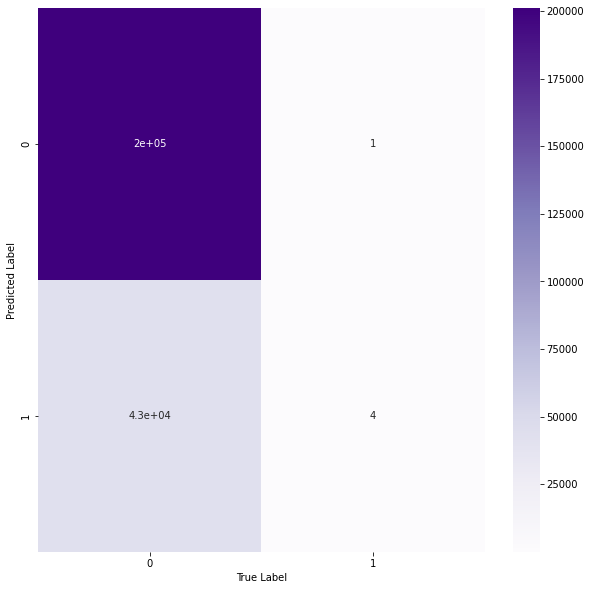

In [ ]:
import seaborn
fig, ax = plt.subplots(figsize=(10,10)) 
s=seaborn.heatmap(rf_eval['cm'],cmap=plt.cm.Purples,annot=True)
s.set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

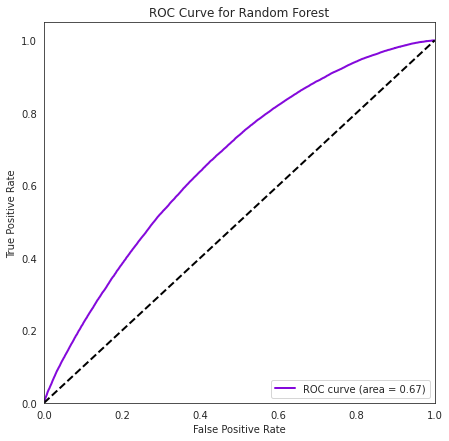

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style("white")
lw = 2
plt.plot(rf_eval['fpr'], rf_eval['tpr'], color='#8409db',
         lw=lw, label='ROC curve (area = %0.2f)' % rf_eval['auc'])
plt.plot([0, 1], [0, 1], color='#000000', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install catboost 

     |████████████████████████████████| 76.3 MB 1.6 MB/s 


In [ ]:
from catboost import CatBoostClassifier
student_id = 811120192

In [ ]:

m = CatBoostClassifier(eval_metric='AUC', loss_function="Logloss")
params = {'learning_rate': [ 0.1],
'depth': [10],
'l2_leaf_reg': [5],
'iterations': [1000]}



In [ ]:
m.grid_search(params,
            X_train,
            y=y_train,
            cv=4,
            partition_random_seed=student_id,
            refit=True,
            shuffle=True,
            stratified=True,
            verbose=True,
            plot=True)

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
import joblib
# Save to file in the current working directory
joblib_file = "models_catboost.cbm"
joblib.dump(m, joblib_file)
import shutil
shutil.copy(joblib_file,'/content/drive/MyDrive/DataSet2020/')


'/content/drive/MyDrive/DataSet2020/models_catboost.cbm'

In [ ]:
joblib_model_catboost = joblib.load(joblib_file)


In [ ]:
catbost_eval = evaluate_model(joblib_model_catboost, X_test, y_test)


In [ ]:
catbost_eval

{'acc': 0.8251617694728592,
 'auc': 0.6819264277337735,
 'cm': array([[200928,    160],
        [ 42450,    173]]),
 'f1': 0.008054753701461961,
 'fpr': array([0.        , 0.        , 0.        , ..., 0.99922422, 0.99922422,
        1.        ]),
 'kappa': 0.005357721116607372,
 'prec': 0.5195195195195195,
 'rec': 0.004058841470567534,
 'tpr': array([0.00000000e+00, 2.34615114e-05, 9.38460456e-05, ...,
        9.99976538e-01, 1.00000000e+00, 1.00000000e+00])}

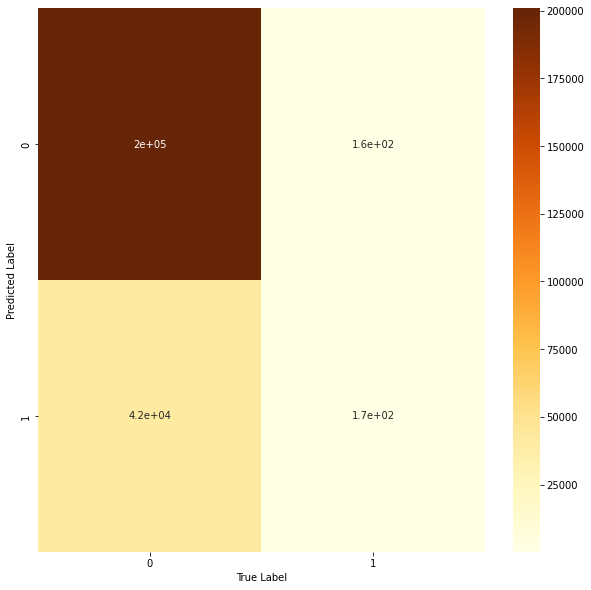

In [ ]:
import seaborn
fig, ax = plt.subplots(figsize=(10,10)) 
s=seaborn.heatmap(catbost_eval['cm'],cmap=plt.cm.YlOrBr,annot=True)
s.set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

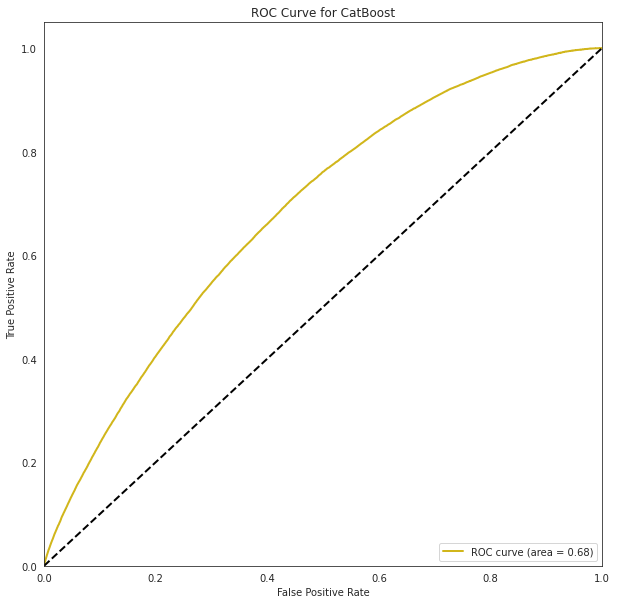

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("white")
lw = 2
plt.plot(catbost_eval['fpr'], catbost_eval['tpr'], color='#d1b61b',
         lw=lw, label='ROC curve (area = %0.2f)' % catbost_eval['auc'])
plt.plot([0, 1], [0, 1], color='#000000', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Test_predict=pd.DataFrame(joblib_model_catboost.predict(test_main),columns=['labels'])

In [ ]:
test_old  = pd.read_csv('/content/drive/MyDrive/DataSet2020/2021_Competition_Holdout.csv' ,low_memory=False)

In [ ]:
Test_predict['ID']=test_old.ID

In [ ]:
Test_predict.head()

,labels,ID
0,0,5M9OS1T3dLc09Ybc7013AI9f
1,0,0M8f45b4a4Of6aS3TL6Ya9AI
2,0,12MOS912Tb204LYacA2fIc22
3,0,M6O69S24T36LYec4AI5d0b56
4,0,45947aM37Oc8S3dTLYA00Ica


In [ ]:
Test_predict.to_csv('/content/drive/MyDrive/DataSet2020/FinalTestPrediction.csv', index=False)
